# From Images to Time-series: character image classification using time-series

In [19]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
from dtw import dtw

In [170]:
DIR = "dataset/"
lists = os.listdir("dataset/")
labels = [0,0,0,1,1,1,2,2,2,3,3,3,4,4,4,5,5,5]
img_name = []
for ls in lists:
    img_name.append(ls[:-4])
    print(DIR+ls)

dataset/arale01.png
dataset/arale02.png
dataset/arale03.png
dataset/bart01.png
dataset/bart02.png
dataset/bart03.png
dataset/batman01.png
dataset/batman02.png
dataset/batman03.png
dataset/conan01.png
dataset/conan02.png
dataset/conan03.png
dataset/goku01.png
dataset/goku02.png
dataset/goku03.png
dataset/yugi01.png
dataset/yugi02.png
dataset/yugi03.png


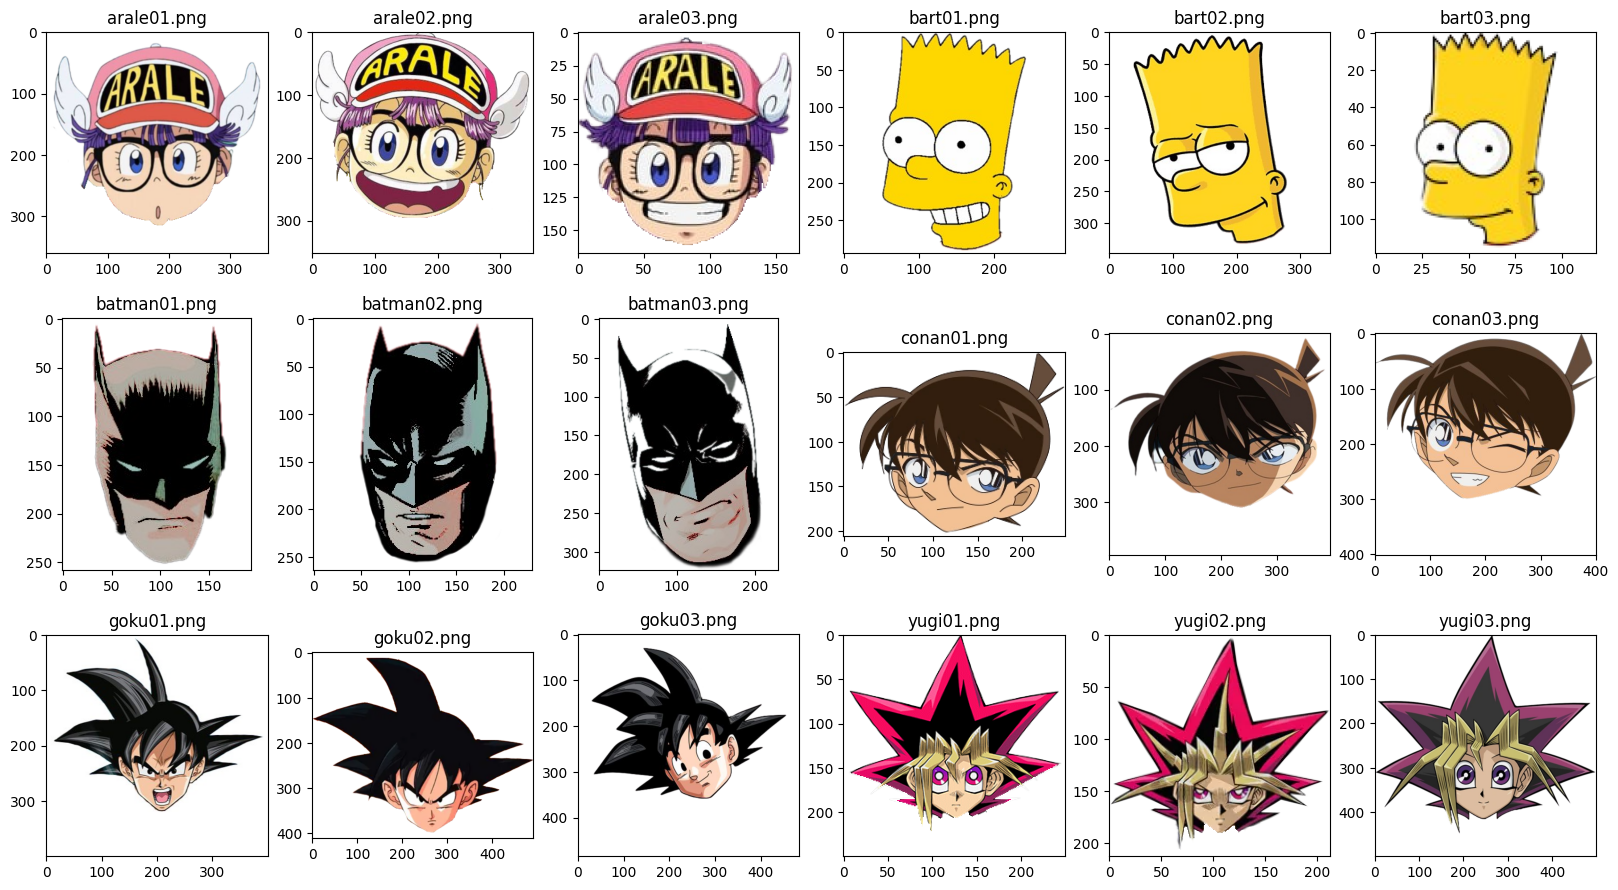

In [171]:
# Sample Data
i=1
plt.figure(figsize=(20,15))
for ls in lists:
    img = cv2.imread(DIR+ls)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(len(lists)//6+1, 6, i)
    plt.title(ls)
    plt.imshow(img)
    i+=1

# Preprocess

In [140]:
def preprocess(gray_img):
    # Resize the image
    new_height, new_width = 400, 400
    img = cv2.resize(gray_img, (new_width, new_height))

    # Threholding
    ret, thresh = cv2.threshold(img, 254, 255, cv2.THRESH_BINARY)

    # Morphological closing
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    close = (close!=255)*1

    # Run the flood fill operation
    h,w = img.shape
    mask = np.zeros((h+2,w+2), np.uint8)
    start_point = (0, 0)
    fill_color = 255

    _, mask, _, _ = cv2.floodFill(close, mask, start_point, fill_color)

    # Get the filled image
    filled = cv2.bitwise_or(close, mask)

    # Inverted Binarization
    inv = (filled!=255)*1
    
    return inv

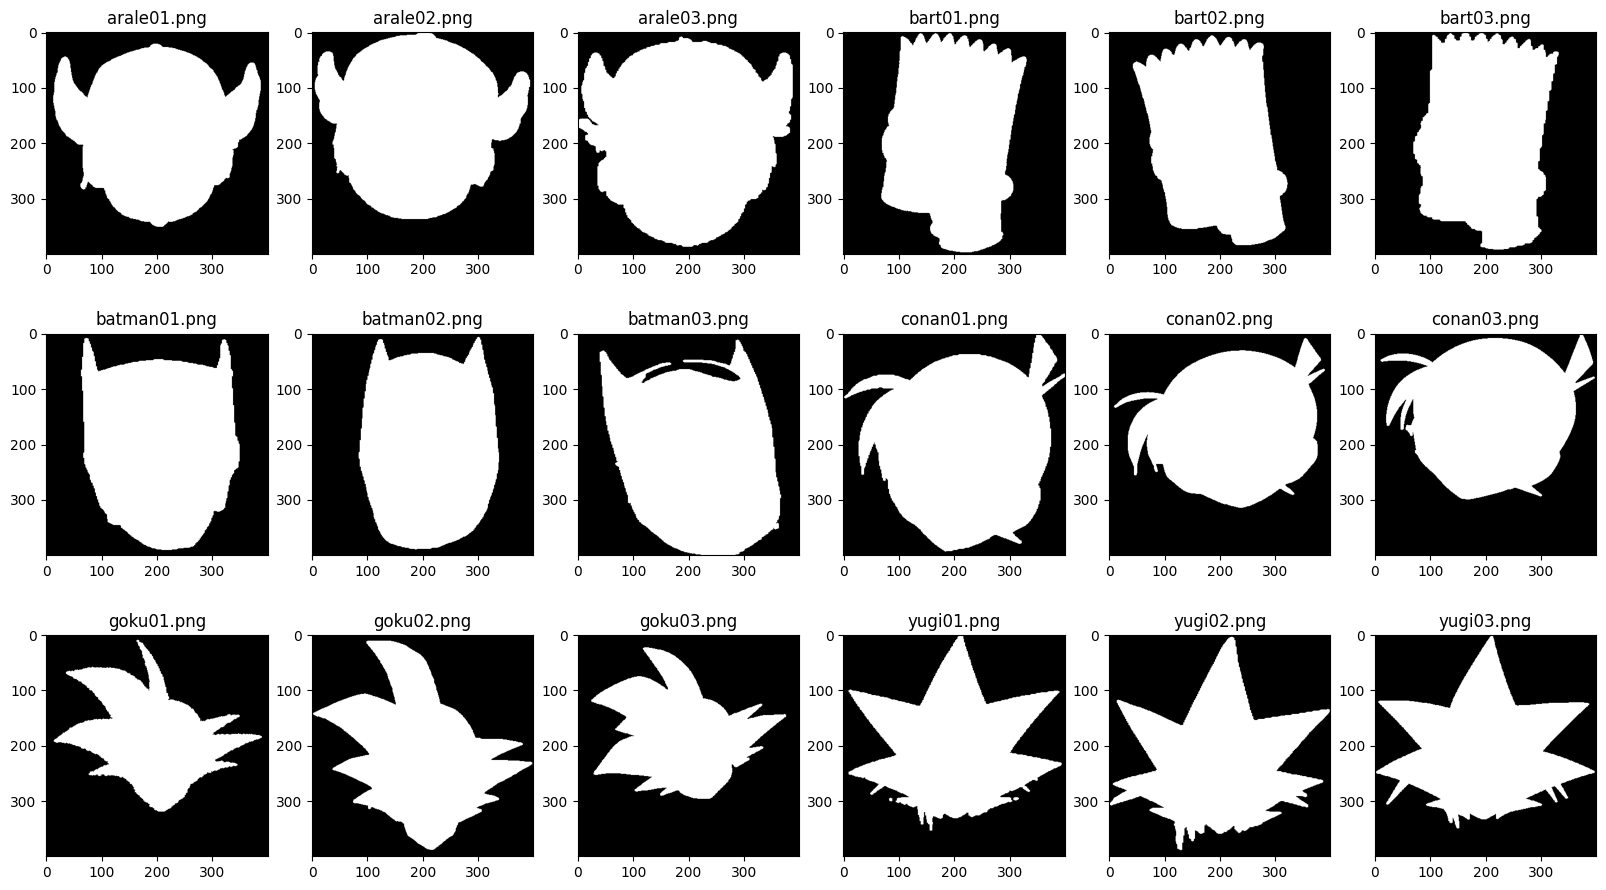

In [143]:
i=1
plt.figure(figsize=(20,15))
for ls in lists:
    img = cv2.imread(DIR+ls, cv2.IMREAD_GRAYSCALE)

    # Preprocess
    prep = preprocess(img)

    plt.subplot(len(lists)//6+1, 6, i)
    plt.title(ls)
    plt.imshow(prep, cmap="gray")
    i+=1

In [165]:
# Define classifier with Dynamic Time Warping (DTW) distances
def dist(x, y):
    return np.linalg.norm(x - y)

def classify(data, labels):
    for i in range(len(data)):
        dis = []
        for j in range(len(data)):
            d = dtw(data[i], data[j], dist=dist)[0]
            dis.append(d)
        closest = np.argsort(dis)[1]
        print(f"{img_name[i]} is closest to {img_name[closest]}", end="\t| ")
        if labels[i]==labels[np.argsort(dis)[1]]: print("Correct!")
        else: print("Wrong!")

# Finding first pixel vertically

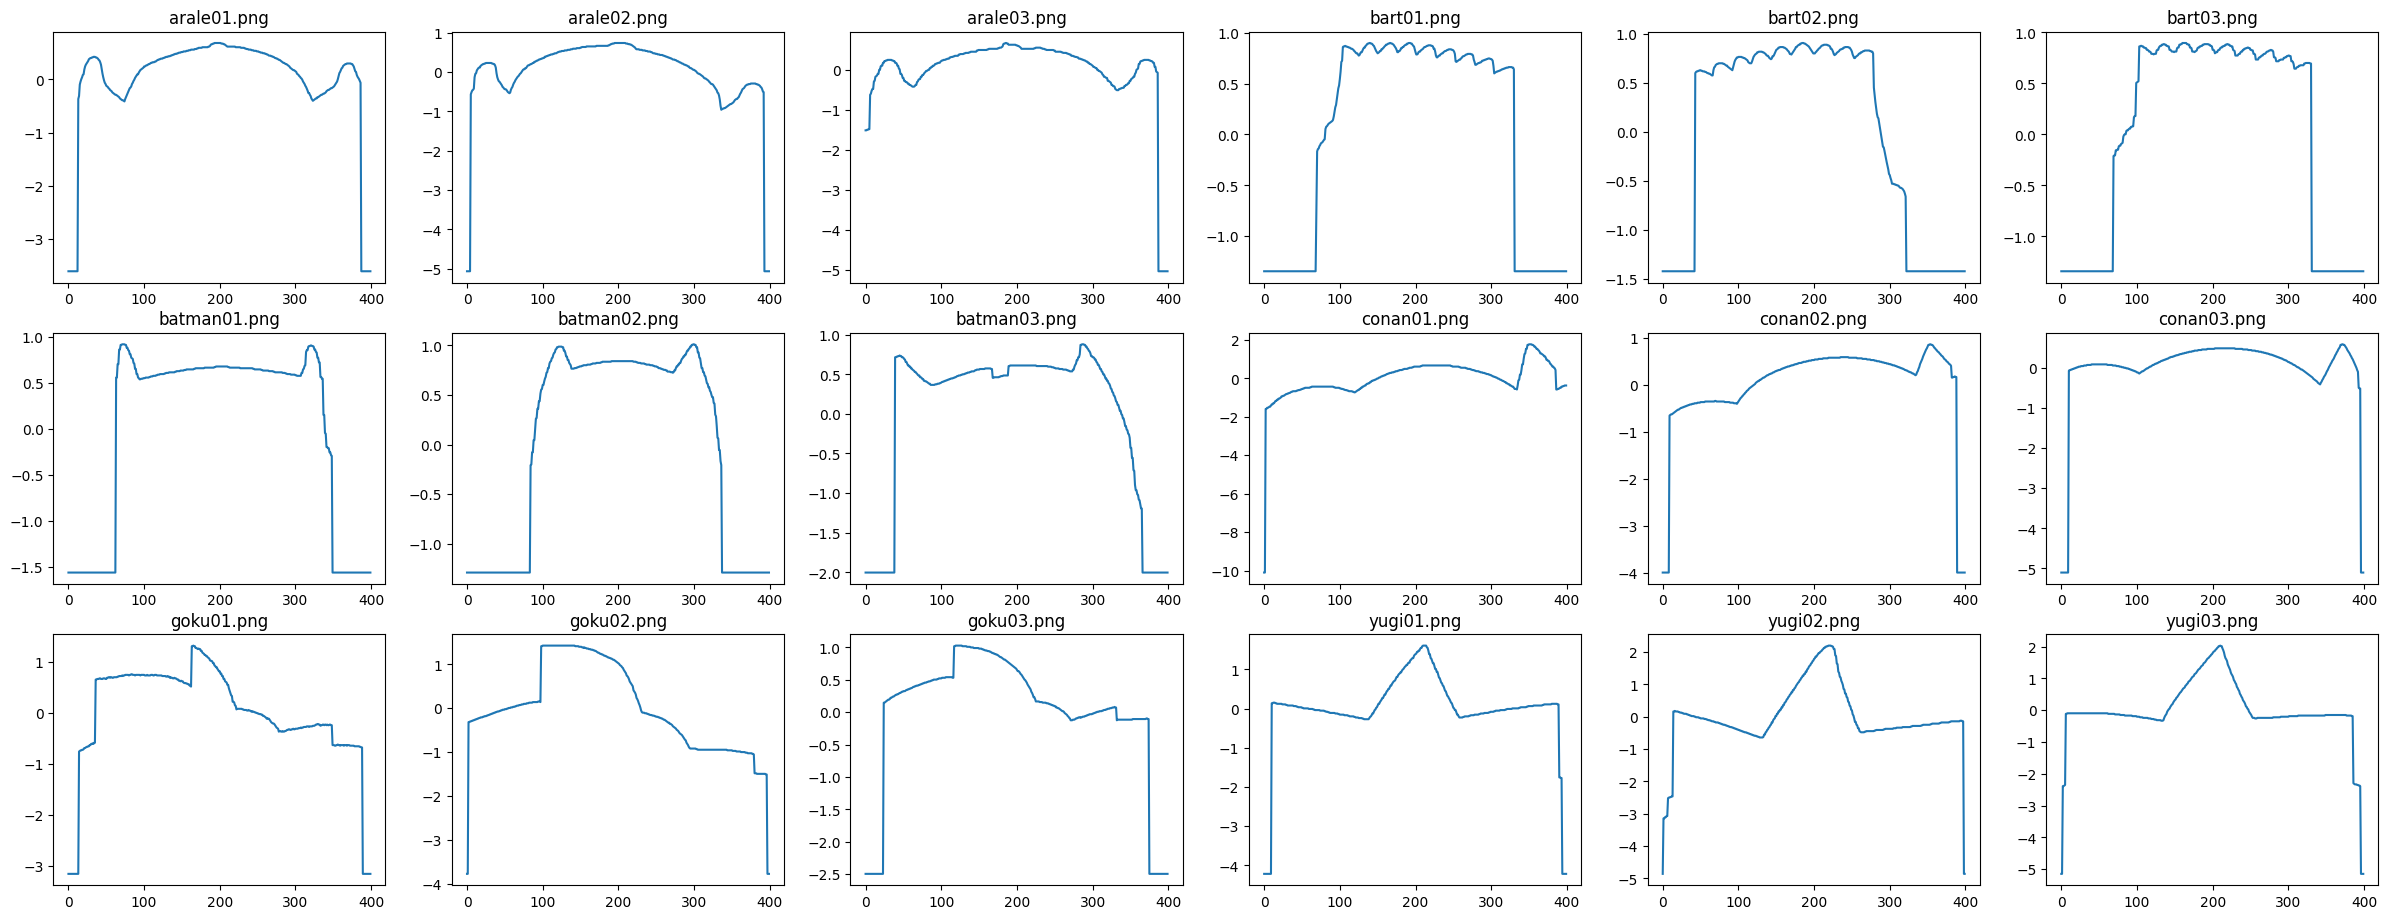

In [167]:
col_first = []

i=1
plt.figure(figsize=(30,15))
for ls in lists:
    img = cv2.imread(DIR+ls, cv2.IMREAD_GRAYSCALE)

    # Preprocess
    prep = preprocess(img)

    # Finding first pixels vertically
    first = []
    for row in range(prep.shape[1]):
        col = prep[:, row]
        idx = np.argmax(col)
        if col[idx] == 1:
            first.append(len(col)-idx)
        else:
            first.append(0)
   
    # Normalization
    norm = (first - np.mean(first)) / np.std(first)
    col_first.append(norm)
    
    plt.subplot(len(lists)//6+1, 6, i)
    plt.title(ls)
    plt.plot(norm)
    i+=1

In [168]:
classify(data=col_first, labels=labels)

arale01 is closest to arale03	| Correct!
arale02 is closest to arale03	| Correct!
arale03 is closest to arale02	| Correct!
bart01 is closest to bart03	| Correct!
bart02 is closest to batman01	| Wrong!
bart03 is closest to bart01	| Correct!
batman01 is closest to bart02	| Wrong!
batman02 is closest to bart01	| Wrong!
batman03 is closest to batman01	| Correct!
conan01 is closest to conan02	| Correct!
conan02 is closest to arale01	| Wrong!
conan03 is closest to arale02	| Wrong!
goku01 is closest to goku03	| Correct!
goku02 is closest to yugi03	| Wrong!
goku03 is closest to batman03	| Wrong!
yugi01 is closest to yugi03	| Correct!
yugi02 is closest to yugi03	| Correct!
yugi03 is closest to yugi02	| Correct!


# Summing the rows

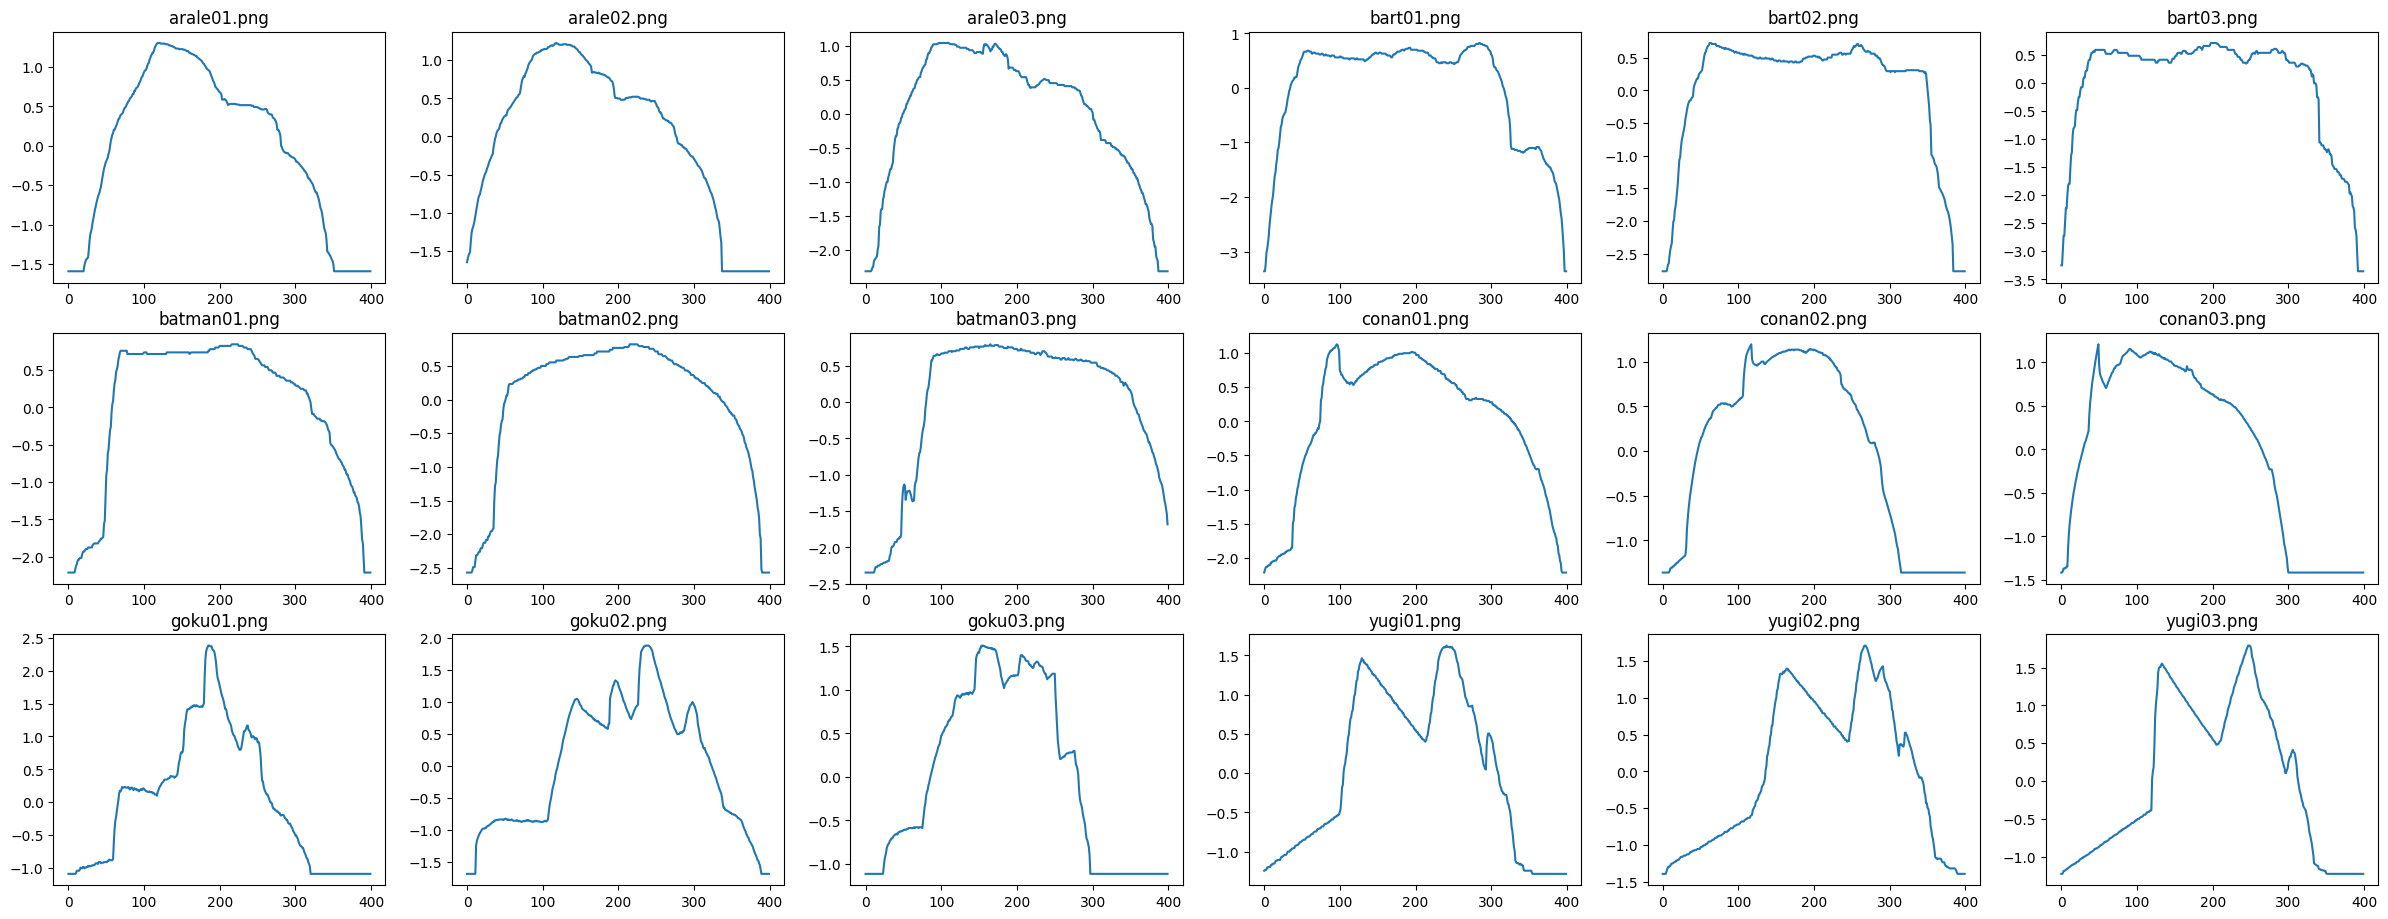

In [148]:
row_sum = []

i=1
plt.figure(figsize=(30,15))
for ls in lists:
    img = cv2.imread(DIR+ls, cv2.IMREAD_GRAYSCALE)

    # Preprocess
    prep = preprocess(img)

    # Sum by rows
    _sum_ = np.sum(prep, axis=1)

    # Normalization
    norm = (_sum_ - np.mean(_sum_)) / np.std(_sum_)
    row_sum.append(norm)

    plt.subplot(len(lists)//6+1, 6, i)
    plt.title(ls)
    plt.plot(norm)
    i+=1

In [173]:
classify(data=row_sum, labels=labels)

arale01 is closest to arale02	| Correct!
arale02 is closest to arale01	| Correct!
arale03 is closest to conan01	| Wrong!
bart01 is closest to bart02	| Correct!
bart02 is closest to bart01	| Correct!
bart03 is closest to bart01	| Correct!
batman01 is closest to batman03	| Correct!
batman02 is closest to batman01	| Correct!
batman03 is closest to batman01	| Correct!
conan01 is closest to batman01	| Wrong!
conan02 is closest to conan03	| Correct!
conan03 is closest to conan02	| Correct!
goku01 is closest to goku03	| Correct!
goku02 is closest to yugi02	| Wrong!
goku03 is closest to goku01	| Correct!
yugi01 is closest to yugi02	| Correct!
yugi02 is closest to yugi01	| Correct!
yugi03 is closest to yugi01	| Correct!


---